In [1]:
import json
import pandas as pd
# Opening JSON file
f = open('/home/ferdinand_t/data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)

In [2]:
df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)
# #df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
# #df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
# #df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

# #df = df[['firstKeyword', 'secondKeyword', 'thirdKeyword', 'fourthKeyword', 'thematicFocusCategory', 'cleanFocusCategory']]

df = df[['firstKeyword', 'keywordStrings', 'cleanFocusCategory']]

df_clean = df.copy()
df_clean = df_clean.dropna()
# df_clean['cleanKeywordStrings'] = [' '.join(map(str, l)) for l in df_clean['keywordStrings']]

In [3]:
import gensim
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("/home/ferdinand_t/Downloads/GoogleNews-vectors-negative300.bin", binary=True)

In [88]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#corpus_train, corpus_test, label_train, label_test, indices_train, indices_test = train_test_split(df_clean['keywordStrings'], df_clean['cleanFocusCategory'].astype(str), df_clean.index, test_size=0.33, random_state=0) 
# Ticket Data
corpus = df_clean['keywordStrings'].astype(str)
 
# Creating the vectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1),stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['cleanFocusCategory']=df_clean['cleanFocusCategory'].values
print(CountVectorizedData.shape)
CountVectorizedData.head()

(79913, 38705)


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,007,01,03,04,05,08,0rg,10,100,...,øystein,út,überall,ünal,ünker,ľudmila,şehriban,štefániková,żurek,cleanFocusCategory
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,History
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Business
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Business
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Conflicts
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Politics


In [69]:
WordsVocab=CountVectorizedData.columns[:-1]

In [105]:
X

<79913x38704 sparse matrix of type '<class 'numpy.int64'>'
	with 592156 stored elements in Compressed Sparse Row format>

In [70]:
#'commerzbank' in WordsVocab

In [71]:
# import numpy as np
# def FunctionText2Vec(inpTextData):
#     # Converting the text to numeric data
#     X = vectorizer.transform(inpTextData)
#     CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
#     # Creating empty dataframe to hold sentences
#     W2Vec_Data=pd.DataFrame()
    
#     # Looping through each row for the data
#     for i in range(CountVecData.shape[0]):
 
#         # initiating a sentence with all zeros
#         Sentence = np.zeros(300)
 
#         # Looping thru each word in the sentence and if its present in 
#         # the Word2Vec model then storing its vector
#         for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
#             #print(word)
#             if word in wv.key_to_index.keys():    
#                 Sentence=Sentence+wv[word]
#         # Appending the sentence to the dataframe
#         W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
#     return(W2Vec_Data)

In [72]:

#W2Vec_Data=FunctionText2Vec(df_clean['keywordStrings'][0:20].astype(str))

In [73]:
# import numpy as np
# X = vectorizer.transform(df_clean['keywordStrings'][0:2].astype(str))
# CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
#     # Creating empty dataframe to hold sentences
# W2Vec_Data=pd.DataFrame()
    
#     # Looping through each row for the data
# for i in range(CountVecData.shape[0]):
 
#         # initiating a sentence with all zeros
#     Sentence = np.zeros(300)
 
#         # Looping thru each word in the sentence and if its present in 
#         # the Word2Vec model then storing its vector
#     for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
#             #print(word)
#         if word in wv.key_to_index.keys():    
#             Sentence=Sentence+wv[word]
#         elif word.capitalize() in wv.key_to_index.keys():
#             Sentence=Sentence+wv[word.capitalize()]
#         else: 
#             print(word)
#         # Appending the sentence to the dataframe
#     W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))

In [74]:
#CountVecData

In [75]:
#W2Vec_Data

In [76]:
#print(df_clean.loc['8762','keywordStrings'])

In [77]:
#print(df_clean.loc['31542','keywordStrings'])

In [93]:
import numpy as np
X = vectorizer.transform(df_clean['keywordStrings'].astype(str))
CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
W2Vec_Data_temp=pd.DataFrame()
    
Sentence_1=[[wv[word] if word in wv.key_to_index.keys() else np.zeros(300) for word in WordsVocab[CountVecData.iloc[i , :]>=1]] for i in range(CountVecData.shape[0])]
W2Vec_Data_temp=W2Vec_Data_temp.append(pd.DataFrame(Sentence_1))
Sentence_2=[[wv[word.capitalize()] if word.capitalize() in wv.key_to_index.keys() and word not in wv.key_to_index.keys()  else np.zeros(300) for word in WordsVocab[CountVecData.iloc[i , :]>=1]] for i in range(CountVecData.shape[0])]
W2Vec_Data_temp=W2Vec_Data_temp.append(pd.DataFrame(Sentence_2))
test_sum_df = W2Vec_Data_temp.groupby(W2Vec_Data_temp.index).sum()
#W2Vec_Data = test_sum_df.sum(axis=1)
test_sum_df[test_sum_df.applymap(lambda x: np.allclose(x, 0))] = np.nan
W2Vec_Data = test_sum_df.apply(lambda x: np.mean(x[x.notnull()]), axis=1)
W2Vec_Data_df = pd.DataFrame(W2Vec_Data)
W2Vec_Data_df_final = W2Vec_Data_df[0].apply(pd.Series)
W2Vec_Data = W2Vec_Data_df_final

/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
WordsVocab[CountVecData.iloc[0 , :]>=1]

Index(['africa', 'africalink', 'crossroads', 'difference', 'generation',
       'headlines', 'making', 'say', 'story'],
      dtype='object')

In [102]:
CountVecData.iloc[0 , :]>=1

000            False
007            False
01             False
03             False
04             False
               ...  
ünker          False
ľudmila        False
şehriban       False
štefániková    False
żurek          False
Name: 0, Length: 38704, dtype: bool

In [107]:
#TODO THEN I DONT HAVE TO CREATE THE DATAFRAME BEFORE THAT STEP
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['cleanFocusCategory']=CountVectorizedData['cleanFocusCategory']
 
# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.loc[DataForML.isna().any(axis=1),0:299] = 0
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,cleanFocusCategory
0,0.037458,0.035431,-0.015442,0.043671,-0.070129,-0.047699,0.074829,-0.150574,0.131897,0.155594,...,0.000526,-0.087601,-0.044266,-0.109833,-0.113205,-0.017700,-0.060272,0.050583,0.054138,History
1,0.064799,0.054057,-0.156643,0.065023,-0.097010,-0.103119,-0.005575,-0.073738,0.069585,0.069987,...,-0.018105,0.012492,0.032450,0.034078,0.159627,0.022573,0.039103,0.086344,-0.116781,Business
2,0.018377,-0.021179,-0.033508,0.115753,-0.068568,0.014430,0.032796,-0.126007,0.115804,0.035848,...,0.194115,-0.118530,0.013265,-0.031565,0.010111,0.117445,0.077148,-0.022380,0.059703,Business
3,0.102661,0.137807,0.086599,0.012533,-0.016418,-0.016357,0.057058,-0.199870,0.013702,0.196411,...,-0.083537,-0.106913,0.098002,-0.084615,0.054179,-0.143148,-0.037420,0.104960,0.117086,Conflicts
4,0.043797,-0.020020,0.067062,0.121277,-0.124695,0.159302,0.042175,-0.220093,0.106903,0.036682,...,-0.047852,-0.077698,-0.012573,0.050293,-0.174744,-0.094299,-0.274170,0.049637,-0.083557,Politics


In [108]:

# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)


 


In [ ]:
# import numpy as np
# X = vectorizer.transform(df_clean['firstKeyword'].astype(str))
# CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
#     # Creating empty dataframe to hold sentences
# W2Vec_Data_temp=pd.DataFrame()
    
# Sentence_1=[[wv[word] if word in wv.key_to_index.keys() else np.zeros(300) for word in WordsVocab[CountVecData.iloc[i , :]>=1]] for i in range(CountVecData.shape[0])]
# W2Vec_Data_temp=W2Vec_Data_temp.append(pd.DataFrame(Sentence_1))        
# Sentence_2=[[wv[word.capitalize()] if word.capitalize() in wv.key_to_index.keys() and word not in wv.key_to_index.keys()  else np.zeros(300) for word in WordsVocab[CountVecData.iloc[i , :]>=1]] for i in range(CountVecData.shape[0])]
# W2Vec_Data_temp=W2Vec_Data_temp.append(pd.DataFrame(Sentence_2))
# test_sum_df = W2Vec_Data_temp.groupby(W2Vec_Data_temp.index).sum()
# #W2Vec_Data = test_sum_df.sum(axis=1)
# test_sum_df[test_sum_df.applymap(lambda x: np.allclose(x, 0))] = np.nan
# W2Vec_Data = test_sum_df.apply(lambda x: np.mean(x[x.notnull()]), axis=1)
# W2Vec_Data_df = pd.DataFrame(W2Vec_Data)
# W2Vec_Data_df_final = W2Vec_Data_df[0].apply(pd.Series)
# W2Vec_Data = W2Vec_Data_df_final
# W2Vec_Data.reset_index(inplace=True, drop=True)
# W2Vec_Data['cleanFocusCategory']=CountVectorizedData['cleanFocusCategory']
# # Assigning to DataForML variable
# DataForML_fkw=W2Vec_Data
# DataForML_fkw.loc[DataForML_fkw.isna().any(axis=1),0:299] = 0

# # Separate Target Variable and Predictor Variables
# TargetVariable_fkw=DataForML_fkw.columns[-1]
# Predictors_fkw=DataForML_fkw.columns[:-1]
 
# X_fkw=DataForML_fkw[Predictors_fkw].values
# y_fkw=DataForML_fkw[TargetVariable_fkw].values

# X_train_fkw, X_test_fkw, y_train_fkw, y_test_fkw = train_test_split(X_fkw, y_fkw, test_size=0.25, random_state=0) 

In [109]:

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59934, 300)
(59934,)
(19979, 300)
(19979,)


In [110]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6488312728364783

: 

In [61]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [62]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.6381010162293341

In [44]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
 
# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
#clf = GaussianNB()
clf = MultinomialNB()
 
# Printing all the parameters of Naive Bayes
print(clf)
 
NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

MultinomialNB()


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

           Architecture       0.00      0.00      0.00        10
                   Arts       0.00      0.00      0.00       107
               Business       1.00      0.00      0.01      2020
Cars and Transportation       0.00      0.00      0.00       132
            Catastrophe       0.00      0.00      0.00       599
                Climate       0.00      0.00      0.00        21
              Conflicts       0.00      0.00      0.00      1487
             Corruption       0.00      0.00      0.00         2
                  Crime       0.00      0.00      0.00      1196
                Culture       0.00      0.00      0.00      1858
                  Dance       0.00      0.00      0.00         5
                 Design       0.00      0.00      0.00         4
          Digital World       0.00      0.00      0.00        42
              Diversity       0.00      0.00      0.00         3
              Education 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=46)
 
# Printing all the parameters of KNN
print(clf)
 
# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
 
# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN


KNeighborsClassifier(n_neighbors=46)


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

           Architecture       0.00      0.00      0.00        10
                   Arts       0.00      0.00      0.00       107
               Business       0.75      0.52      0.62      2020
Cars and Transportation       0.50      0.09      0.15       132
            Catastrophe       0.54      0.39      0.45       599
                Climate       0.00      0.00      0.00        21
              Conflicts       0.45      0.50      0.47      1487
             Corruption       0.00      0.00      0.00         2
                  Crime       0.54      0.40      0.46      1196
                Culture       0.67      0.52      0.59      1858
                  Dance       0.00      0.00      0.00         5
                 Design       0.00      0.00      0.00         4
          Digital World       0.00      0.00      0.00        42
              Diversity       0.00      0.00      0.00         3
              Education 

In [46]:
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
 
# Printing all the parameters of logistic regression
# print(clf)
 
# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
 
# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['Survived']=y_test
TestingData['Predicted_Survived']=prediction
print(TestingData.head())
 
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))
 
## Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
## Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score
 
## Running 10-Fold Cross validation on a given algorithm
## Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


          0         1         2         3         4         5         6  \
0  0.461164  0.364236  0.540574  0.458724  0.521273  0.663672  0.346977   
1  0.317105  0.326145  0.563875  0.363254  0.750566  0.658474  0.520716   
2  0.421529  0.410348  0.477047  0.469305  0.605007  0.527551  0.384802   
3  0.301420  0.388042  0.558668  0.333140  0.717092  0.546199  0.572567   
4  0.581959  0.351630  0.290939  0.428102  0.725028  0.597278  0.231202   

          7         8         9  ...       292       293       294       295  \
0  0.499663  0.463192  0.555038  ...  0.735587  0.621939  0.467713  0.622281   
1  0.637010  0.461076  0.635882  ...  0.526223  0.456953  0.514804  0.561677   
2  0.690352  0.544605  0.602065  ...  0.708767  0.491091  0.760175  0.592852   
3  0.605582  0.482384  0.500066  ...  0.561804  0.385071  0.542578  0.554821   
4  0.405439  0.569468  0.558507  ...  0.555420  0.368912  0.747028  0.672402   

        296       297       298       299                Survived  \

/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

           Architecture       0.00      0.00      0.00        10
                   Arts       0.38      0.14      0.20       107
               Business       0.69      0.67      0.68      2020
Cars and Transportation       0.39      0.23      0.29       132
            Catastrophe       0.56      0.48      0.52       599
                Climate       0.00      0.00      0.00        21
              Conflicts       0.55      0.41      0.47      1487
             Corruption       0.00      0.00      0.00         2
                  Crime       0.54      0.47      0.50      1196
                Culture       0.62      0.66      0.64      1858
                  Dance       0.00      0.00      0.00         5
                 Design       1.00      0.50      0.67         4
          Digital World       0.20      0.05      0.08        42
              Diversity       0.00      0.00      0.00         3
              Education 

DecisionTreeClassifier(max_depth=20)


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

           Architecture       0.00      0.00      0.00        10
                   Arts       0.04      0.06      0.04       107
               Business       0.38      0.40      0.39      2020
Cars and Transportation       0.04      0.03      0.03       132
            Catastrophe       0.21      0.18      0.19       599
                Climate       0.00      0.00      0.00        21
              Conflicts       0.30      0.33      0.31      1487
             Corruption       0.00      0.00      0.00         2
                  Crime       0.23      0.20      0.22      1196
                Culture       0.37      0.37      0.37      1858
                  Dance       0.00      0.00      0.00         5
                 Design       0.00      0.00      0.00         4
          Digital World       0.04      0.02      0.03        42
              Diversity       0.00      0.00      0.00         3
              Education 

<AxesSubplot:>

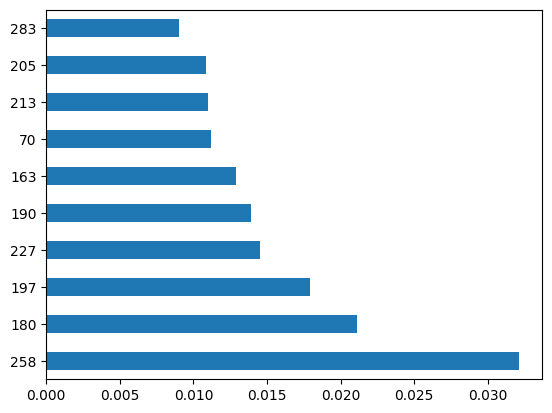

In [47]:
# Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')
 
# Printing all the parameters of Decision Trees
print(clf)
 
# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
 
# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [48]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)
 
# Printing all the parameters of Adaboost
print(clf)
 
# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
 
# Plotting the feature importance for Top 10 most important columns
#%matplotlib inline
#feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)


/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ferdinand_t/venv/lib64/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

           Architecture       0.00      0.00      0.00        10
                   Arts       0.00      0.00      0.00       107
               Business       0.00      0.00      0.00      2020
Cars and Transportation       0.00      0.00      0.00       132
            Catastrophe       0.00      0.00      0.00       599
                Climate       0.00      0.00      0.00        21
              Conflicts       0.00      0.00      0.00      1487
             Corruption       0.00      0.00      0.00         2
                  Crime       0.00      0.00      0.00      1196
                Culture       0.00      0.00      0.00      1858
                  Dance       0.00      0.00      0.00         5
                 Design       0.00      0.00      0.00         4
          Digital World       0.00      0.00      0.00        42
              Diversity       0.00      0.00      0.00         3
              Education 

In [49]:
df_clean.loc[:,'cleanFocusCategory']

8762                     History
31542                   Business
31543                   Business
31544                  Conflicts
31545                   Politics
                   ...          
175654                  Politics
175655    Nature and Environment
175656                 Conflicts
175657                  Business
175658                  Politics
Name: cleanFocusCategory, Length: 79913, dtype: object

In [66]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
 
X=DataForML[Predictors].values
#y=DataForML[TargetVariable].values
y = pd.get_dummies(df_clean['cleanFocusCategory'])
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(53541, 300)
(53541, 46)
(26372, 300)
(26372, 46)


In [67]:
y

,Architecture,Arts,Business,Cars and Transportation,Catastrophe,Climate,Conflicts,Corruption,Crime,Culture,...,Rule of Law,Science,Soccer,Society,Sports,Technology,Terrorism,Theater,Trade,Travel
8762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31542,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31543,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31544,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175656,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175657,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [69]:
#train_size = int(len(df) * .7)
#train_posts = df_clean['keywordStrings'][:train_size]
#train_tags = df_clean['cleanFocusCategory'][:train_size]

#test_posts = df_clean['keywordStrings'][train_size:]
#test_tags = df_clean['cleanFocusCategory'][train_size:]

#max_words = 20000
#tokenize = text.Tokenizer(num_words=max_words, lower= True, char_level=False)
#tokenize.fit_on_texts(train_posts) # only fit on train

#x_train = features_train
#x_test = features_test

#x_train = df_clean['keywordStrings'][:train_size]
#x_test = df_clean['keywordStrings'][train_size:]

#encoder = LabelEncoder()
#encoder.fit(y_train)
#labels_train = df_clean_dummy[indices_train,:]
#labels_test = df_clean_dummy[indices_test,:]

#num_classes = np.max(labels_train) + 1
#y_train = utils.to_categorical(labels_train, num_classes)
#y_test = utils.to_categorical(labels_train, num_classes)

num_classes = 46

batch_size = 100
epochs = 10

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
482/482 [==============================] - 4s 6ms/step - loss: 1.5743 - accuracy: 0.5749 - val_loss: 1.2921 - val_accuracy: 0.6112
Epoch 2/10
482/482 [==============================] - 3s 6ms/step - loss: 1.2528 - accuracy: 0.6241 - val_loss: 1.2237 - val_accuracy: 0.6237
Epoch 3/10
482/482 [==============================] - 3s 6ms/step - loss: 1.1897 - accuracy: 0.6382 - val_loss: 1.1910 - val_accuracy: 0.6303
Epoch 4/10
482/482 [==============================] - 3s 7ms/step - loss: 1.1500 - accuracy: 0.6460 - val_loss: 1.1734 - val_accuracy: 0.6360
Epoch 5/10
482/482 [==============================] - 3s 7ms/step - loss: 1.1204 - accuracy: 0.6515 - val_loss: 1.1669 - val_accuracy: 0.6349
Epoch 6/10
482/482 [==============================] - 3s 6ms/step - loss: 1.0916 - accuracy: 0.6610 - val_loss: 1.1532 - val_accuracy: 0.6375
Epoch 7/10
482/482 [==============================] - 3s 6ms/step - loss: 1.0730 - accuracy: 0.6639 - val_loss: 1.1520 - val_accuracy: 0.6353
Epoch 

: 